In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [8]:
avg_data = pd.read_csv('Keyword_metrics_Avg.csv')
total_data = pd.read_csv('Keyword_metrics_Total.csv')

In [9]:
avg_data

,K_Value,Topic,TFIDF_acc_avg,TFIDF_pc_avg,TFIDF_rc_avg,TFIDF_f1_avg,TFIDF_fb15_avg,TFIDF_fb20_avg,TFIDF_fb25_avg,TFIDF_fb30_avg,...,TextRank_fb25_avg,TextRank_fb30_avg,LDA_acc_avg,LDA_pc_avg,LDA_rc_avg,LDA_f1_avg,LDA_fb15_avg,LDA_fb20_avg,LDA_fb25_avg,LDA_fb30_avg
0,1,Visually_impaired_mom,0.2000,0.8000,0.2000,0.3200,0.2600,0.2353,0.2230,0.2162,...,0.0000,0.0000,0.2500,1.0000,0.2500,0.4000,0.3250,0.2941,0.2788,0.2703
1,1,Okmart_charity_event,0.1000,0.5000,0.1000,0.1666,0.1326,0.1190,0.1124,0.1087,...,0.0000,0.0000,0.1750,0.8750,0.1750,0.2916,0.2321,0.2083,0.1967,0.1902
2,1,life_rebuild_event,0.0185,0.1667,0.0185,0.0333,0.0255,0.0225,0.0211,0.0203,...,0.0000,0.0000,0.0824,0.7500,0.0824,0.1485,0.1135,0.1002,0.0939,0.0904
3,1,dark experience,0.0333,0.2000,0.0333,0.0572,0.0448,0.0400,0.0377,0.0364,...,0.0000,0.0000,0.1834,1.0000,0.1834,0.3086,0.2444,0.2188,0.2064,0.1996
4,2,Visually_impaired_mom,0.1600,0.4000,0.2000,0.2666,0.2364,0.2222,0.2148,0.2106,...,0.0000,0.0000,0.5000,1.0000,0.5000,0.6667,0.5909,0.5556,0.5370,0.5263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,34,dark experience,0.0487,0.0529,0.3500,0.0915,0.1274,0.1634,0.1954,0.2220,...,0.0000,0.0000,0.1449,0.1471,0.9000,0.2521,0.3478,0.4421,0.5241,0.5916
136,35,Visually_impaired_mom,0.0541,0.0571,0.5000,0.1025,0.1476,0.1960,0.2416,0.2816,...,0.0000,0.0000,0.1081,0.1086,0.9500,0.1949,0.2807,0.3726,0.4592,0.5352
137,35,Okmart_charity_event,0.0886,0.0928,0.6500,0.1625,0.2284,0.2954,0.3557,0.4062,...,0.0210,0.0219,0.1429,0.1429,1.0000,0.2501,0.3514,0.4546,0.5473,0.6251
138,35,life_rebuild_event,0.0444,0.0524,0.2238,0.0845,0.1108,0.1343,0.1531,0.1675,...,0.0671,0.0707,0.2102,0.2143,0.8597,0.3423,0.4448,0.5346,0.6052,0.6586


In [10]:
# 把四個主題依照K Value壓在一起的平均值DF
avg_alltopic = avg_data.groupby(['K_Value']).mean()
avg_alltopic

,TFIDF_acc_avg,TFIDF_pc_avg,TFIDF_rc_avg,TFIDF_f1_avg,TFIDF_fb15_avg,TFIDF_fb20_avg,TFIDF_fb25_avg,TFIDF_fb30_avg,TextRank_acc_avg,TextRank_pc_avg,...,TextRank_fb25_avg,TextRank_fb30_avg,LDA_acc_avg,LDA_pc_avg,LDA_rc_avg,LDA_f1_avg,LDA_fb15_avg,LDA_fb20_avg,LDA_fb25_avg,LDA_fb30_avg
K_Value,,,,,,,,,,,,,,,,,,,,,
1,0.087950,0.416675,0.087950,0.144275,0.115725,0.104200,0.098550,0.095400,0.000000,0.000000,...,0.000000,0.000000,0.172700,0.906250,0.172700,0.287175,0.228750,0.205350,0.193950,0.187625
2,0.074450,0.218750,0.090550,0.126600,0.109700,0.102125,0.098225,0.096000,0.000000,0.000000,...,0.000000,0.000000,0.325150,0.870825,0.331475,0.472600,0.405600,0.376025,0.360925,0.352300
3,0.079675,0.179125,0.111400,0.135625,0.124950,0.119825,0.117025,0.115425,0.000000,0.000000,...,0.000000,0.000000,0.398925,0.792400,0.440250,0.555375,0.503500,0.479100,0.466250,0.458725
4,0.069225,0.134375,0.111400,0.120150,0.116375,0.114500,0.113475,0.112900,0.000000,0.000000,...,0.000000,0.000000,0.457225,0.742700,0.542400,0.614175,0.582550,0.567275,0.559100,0.554325
5,0.069225,0.117500,0.123900,0.118975,0.120500,0.121575,0.122225,0.122675,0.000000,0.000000,...,0.000000,0.000000,0.444575,0.653325,0.587550,0.605100,0.595675,0.591975,0.590275,0.589350
6,0.067850,0.109725,0.134550,0.119025,0.124100,0.127400,0.129475,0.130775,0.002975,0.006950,...,0.004850,0.004800,0.478075,0.623625,0.670950,0.631800,0.642950,0.651275,0.656750,0.660400
7,0.074600,0.117300,0.162075,0.133500,0.142500,0.148500,0.152350,0.154875,0.002775,0.005950,...,0.004775,0.004725,0.460350,0.565450,0.703375,0.612725,0.640900,0.659975,0.672200,0.680200
8,0.068275,0.102600,0.162075,0.123300,0.135050,0.143100,0.148350,0.151825,0.005200,0.010425,...,0.009400,0.009350,0.437525,0.519525,0.735775,0.595525,0.638550,0.667750,0.686700,0.699150
9,0.066500,0.096750,0.170425,0.121250,0.135575,0.145650,0.152350,0.156850,0.006125,0.011575,...,0.011575,0.011575,0.420275,0.481475,0.763800,0.577750,0.633050,0.671400,0.696675,0.713450


In [11]:
total_data.head(5)

,K_Value,Text_Num,Topic,TFIDF_acc,TFIDF_pc,TFIDF_rc,TFIDF_f1,TFIDF_fb15,TFIDF_fb20,TFIDF_fb25,...,TextRank_fb25,TextRank_fb30,LDA_acc,LDA_pc,LDA_rc,LDA_f1,LDA_fb15,LDA_fb20,LDA_fb25,LDA_fb30
0,1,96,Visually_impaired_mom,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,...,0.0,0.0,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,0.2703
1,1,97,Visually_impaired_mom,0.00,0.0,0.00,0.0,0.000,0.0000,0.0000,...,0.0,0.0,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,0.2703
2,1,98,Visually_impaired_mom,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,...,0.0,0.0,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,0.2703
3,1,101,Visually_impaired_mom,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,...,0.0,0.0,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,0.2703
4,1,107,Visually_impaired_mom,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,...,0.0,0.0,0.25,1.0,0.25,0.4,0.325,0.2941,0.2788,0.2703


In [12]:
Topic1_avg = avg_data.loc[avg_data['Topic']=='Visually_impaired_mom']
Topic2_avg = avg_data.loc[avg_data['Topic']=='Okmart_charity_event']
Topic3_avg = avg_data.loc[avg_data['Topic']=='life_rebuild_event']
Topic4_avg = avg_data.loc[avg_data['Topic']=='dark experience']

<Figure size 432x288 with 0 Axes>

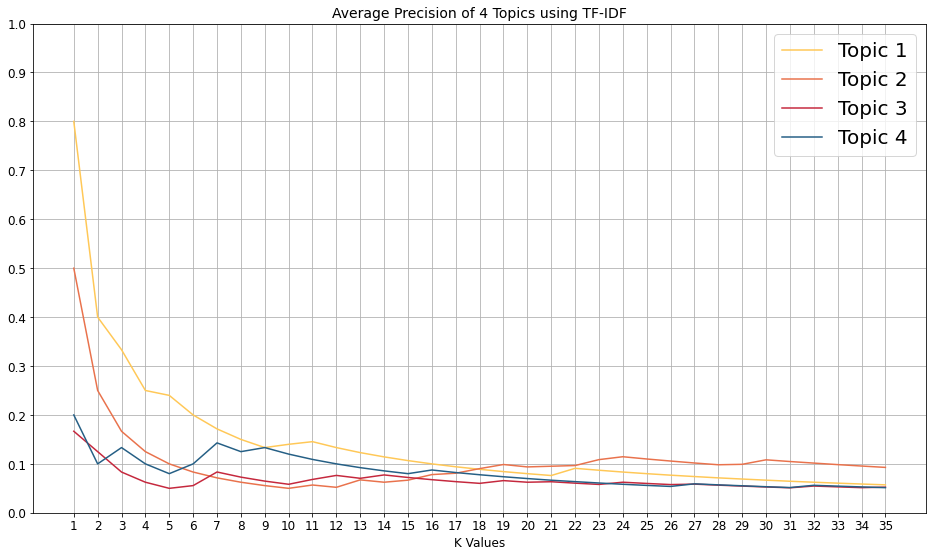

In [13]:
# 繪製Average Precision of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of 4 Topics using TF-IDF", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_pc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Precision of 4 Topics using TF-IDF.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

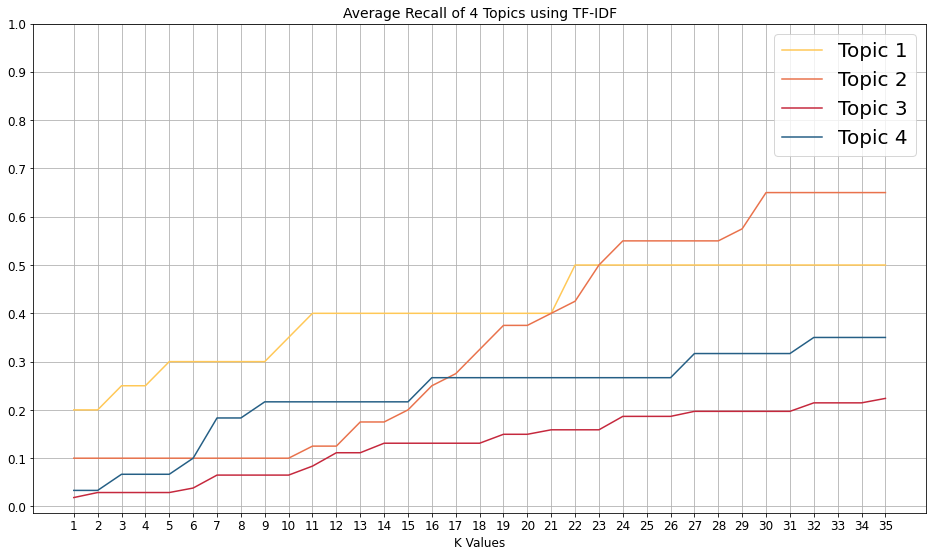

In [14]:
# 繪製Average Recall of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of 4 Topics using TF-IDF", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_rc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Recall of 4 Topics using TF-IDF.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

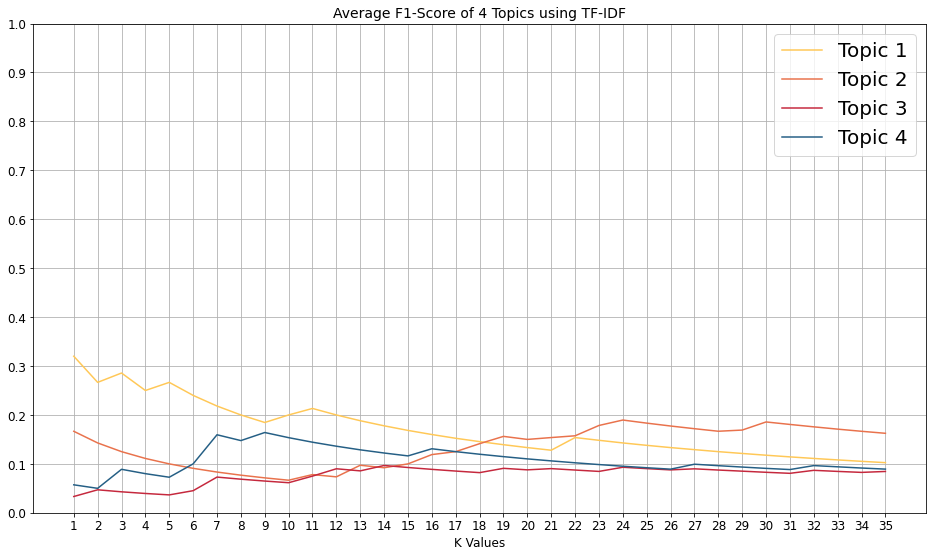

In [15]:
# 繪製Average F1-Score of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of 4 Topics using TF-IDF", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_f1_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average F1-Score of 4 Topics using TF-IDF.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

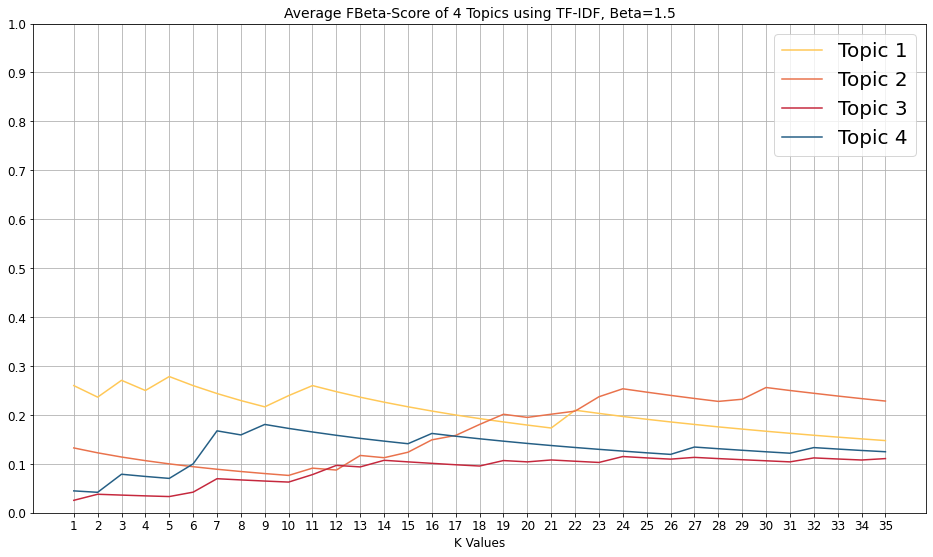

In [16]:
# 繪製Average Fb15-Score of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TF-IDF, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb15_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TF-IDF_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

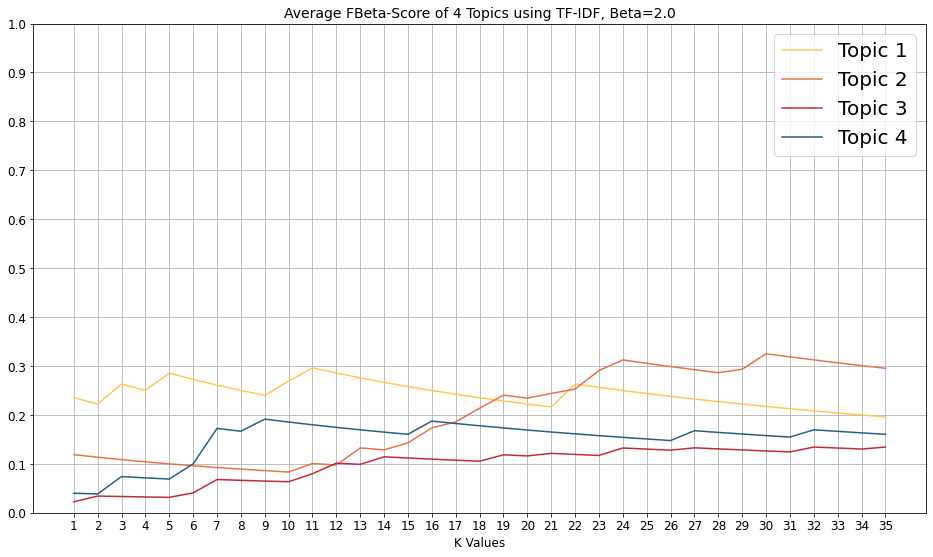

In [17]:
# 繪製Average Fb20-Score of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TF-IDF, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb20_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TF-IDF_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

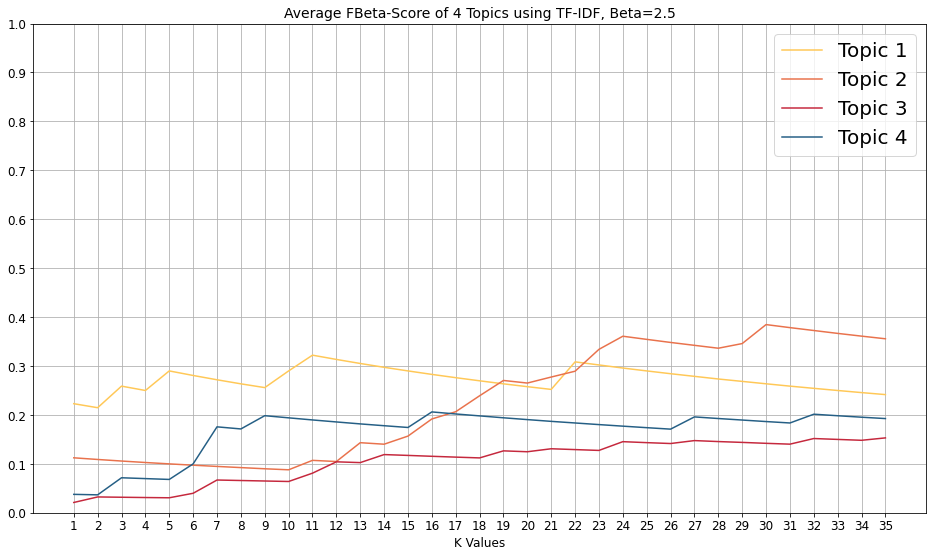

In [18]:
# 繪製Average Fb25-Score of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TF-IDF, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb25_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TF-IDF_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

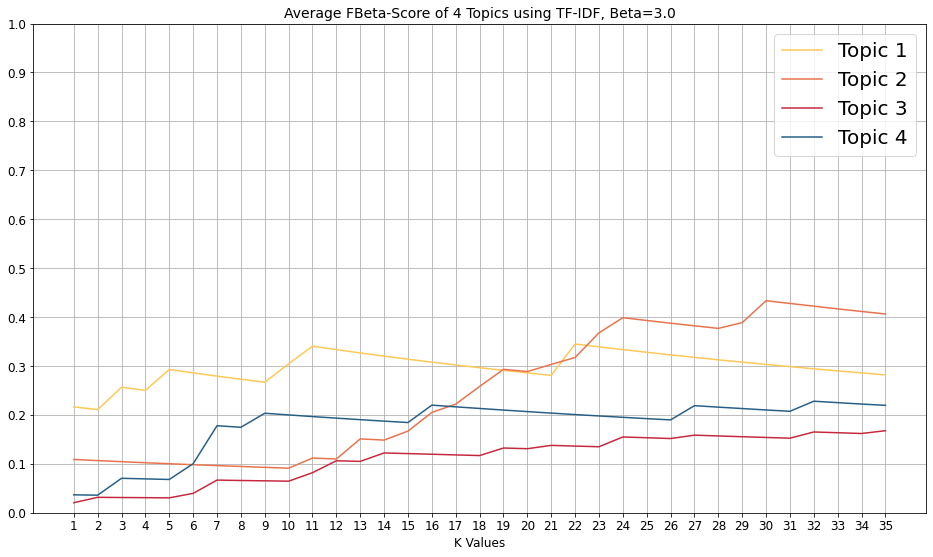

In [19]:
# 繪製Average Fb30-Score of 4 Topics using TF-IDF
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TF-IDF, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb30_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TF-IDF_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

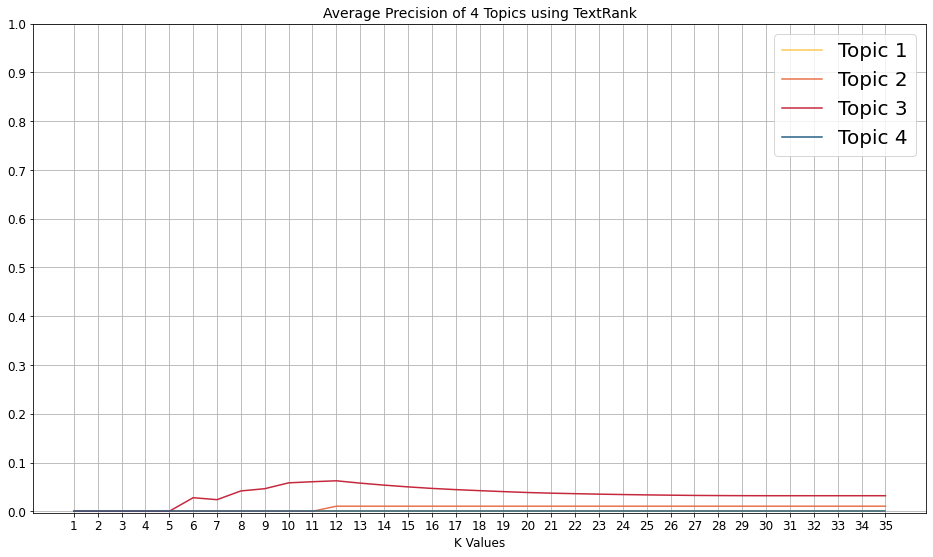

In [20]:
# 繪製Average Precision of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of 4 Topics using TextRank", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_pc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Precision of 4 Topics using TextRank.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

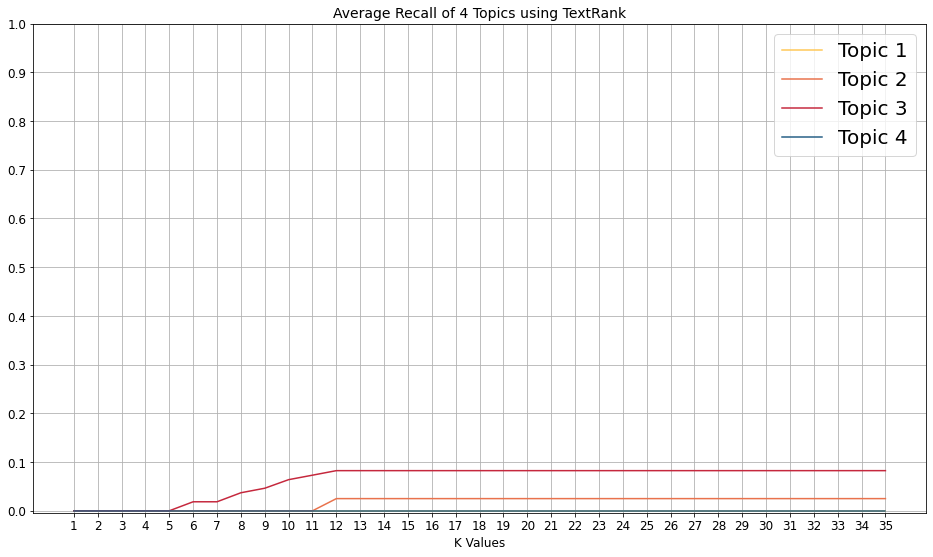

In [21]:
# 繪製Average Recall of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of 4 Topics using TextRank", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_rc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Recall of 4 Topics using TextRank.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

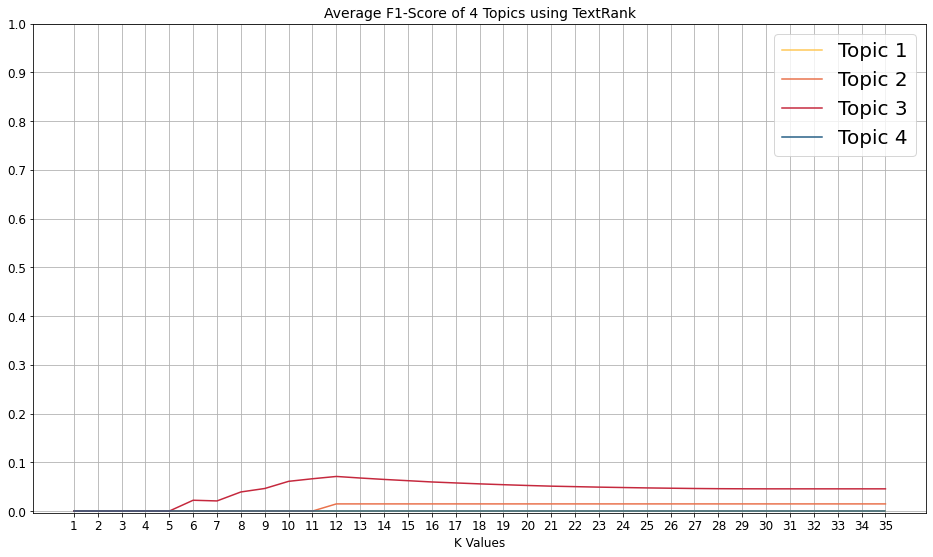

In [22]:
# 繪製Average F1-Score of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of 4 Topics using TextRank", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_f1_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average F1-Score of 4 Topics using TextRank.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

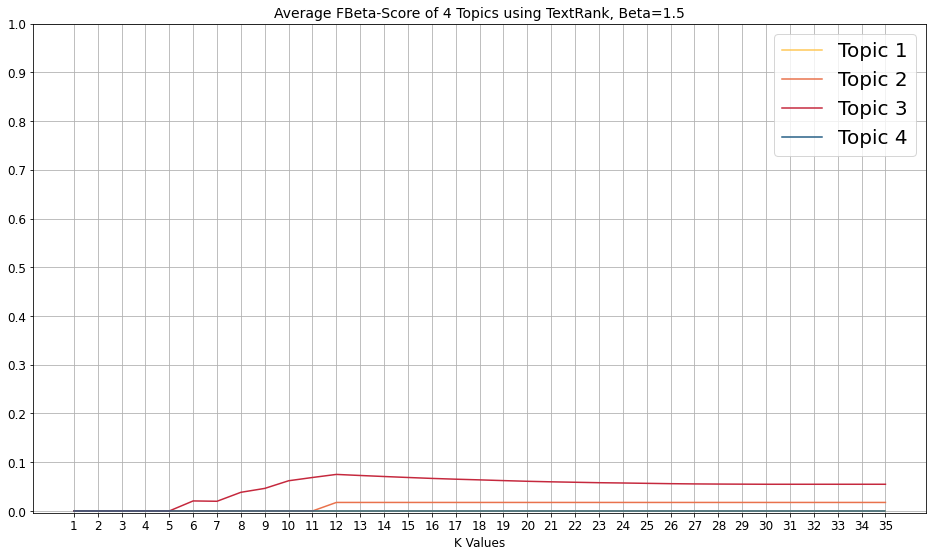

In [23]:
# 繪製Average FB15-Score of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TextRank, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb15_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TextRank_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

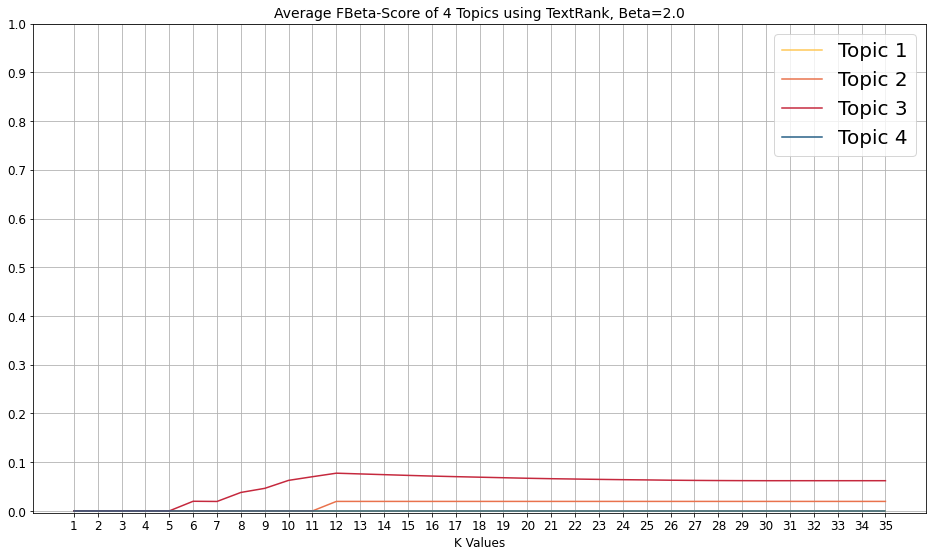

In [24]:
# 繪製Average FB20-Score of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TextRank, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb20_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TextRank_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

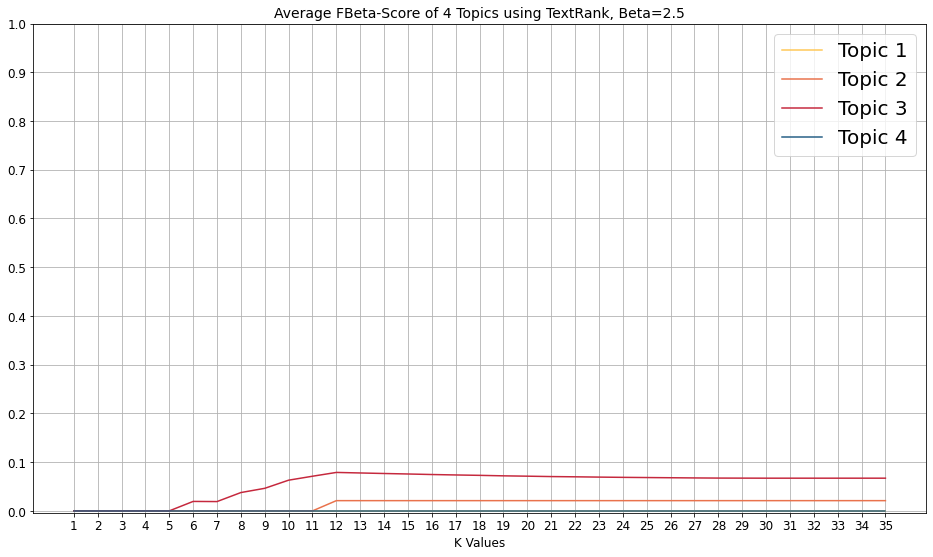

In [25]:
# 繪製Average FB25-Score of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TextRank, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb25_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TextRank_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

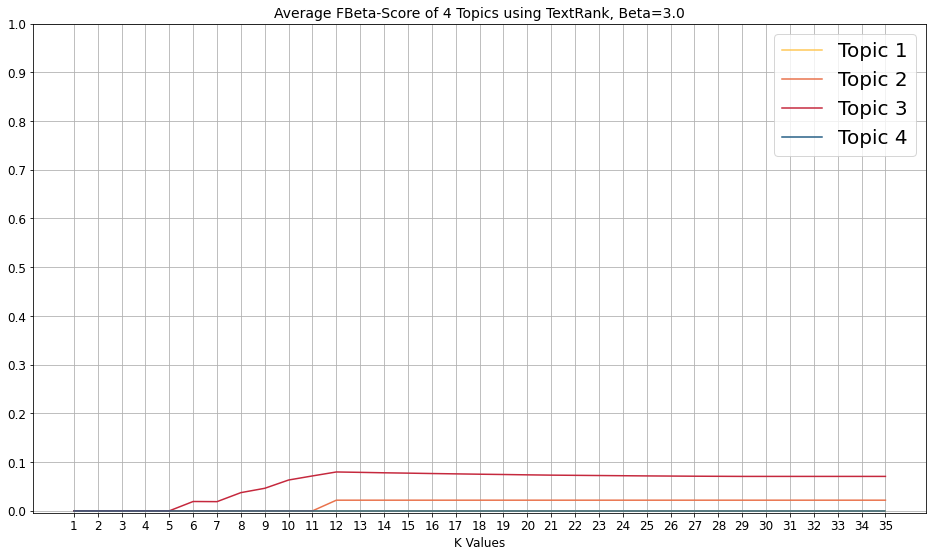

In [26]:
# 繪製Average FB30-Score of 4 Topics using TextRank
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using TextRank, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb30_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using TextRank_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

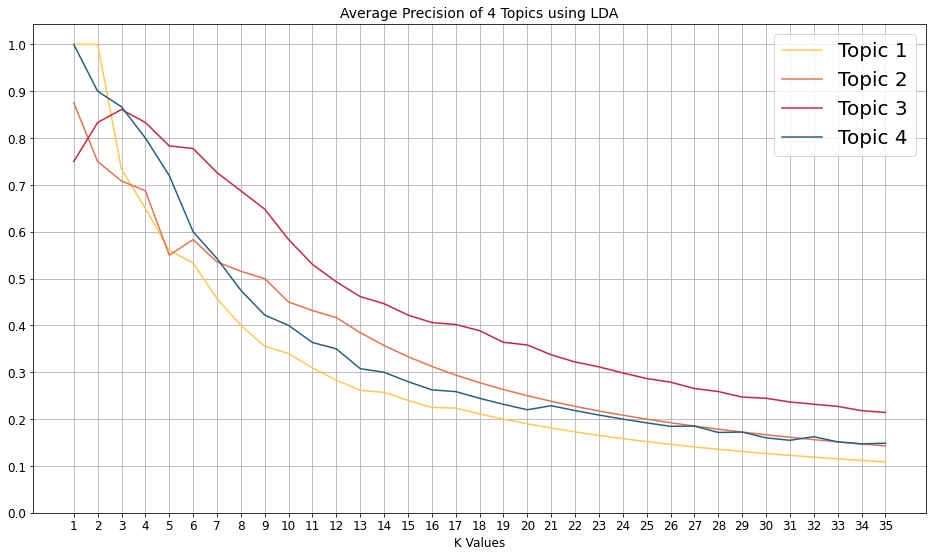

In [27]:
# 繪製Average Precision of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of 4 Topics using LDA", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_pc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Precision of 4 Topics using LDA.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

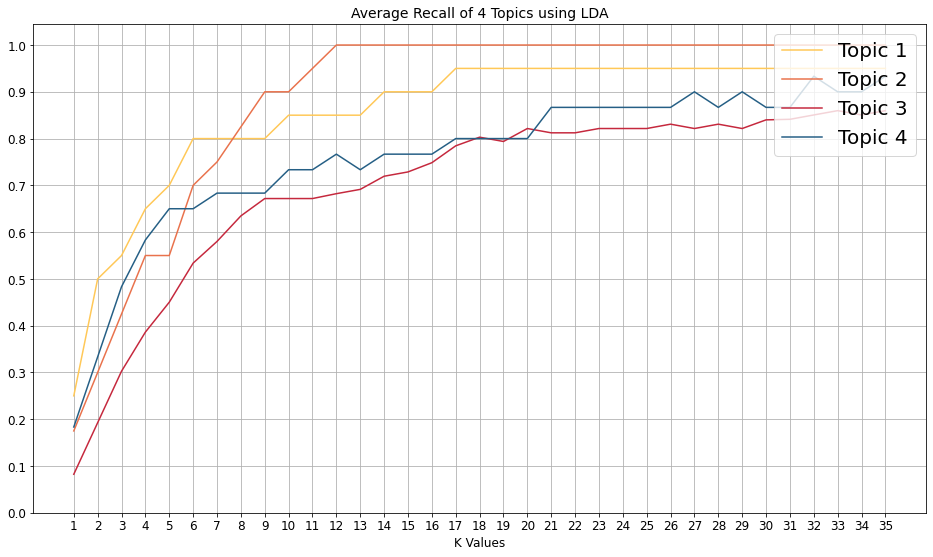

In [28]:
# 繪製Average Recall of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of 4 Topics using LDA", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_rc_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Recall of 4 Topics using LDA.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

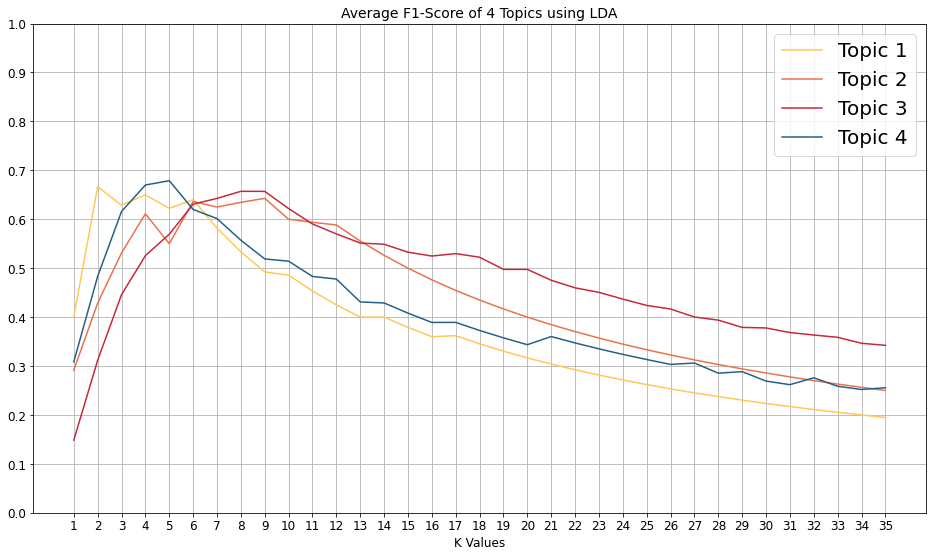

In [29]:
# 繪製Average F1-Score of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of 4 Topics using LDA", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_f1_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average F1-Score of 4 Topics using LDA.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

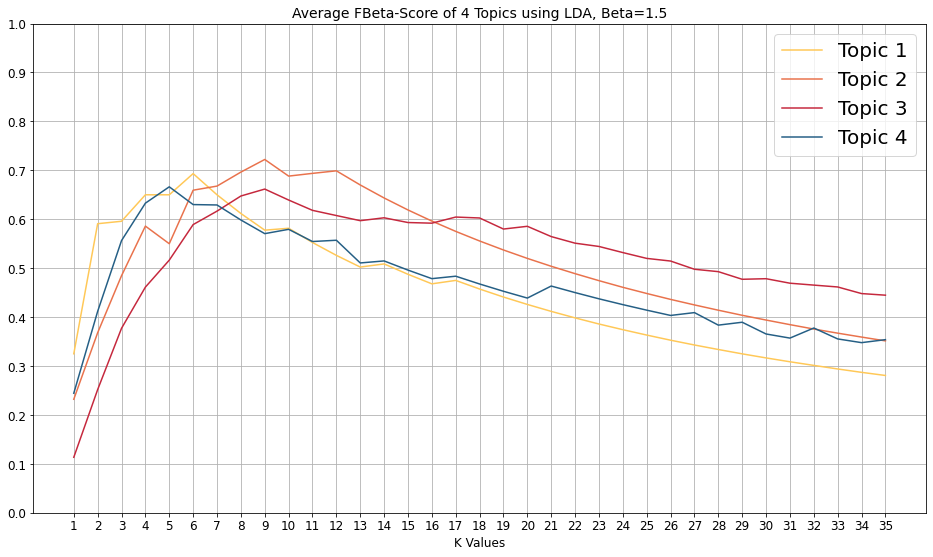

In [30]:
# 繪製Average FB15-Score of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using LDA, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb15_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using LDA_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

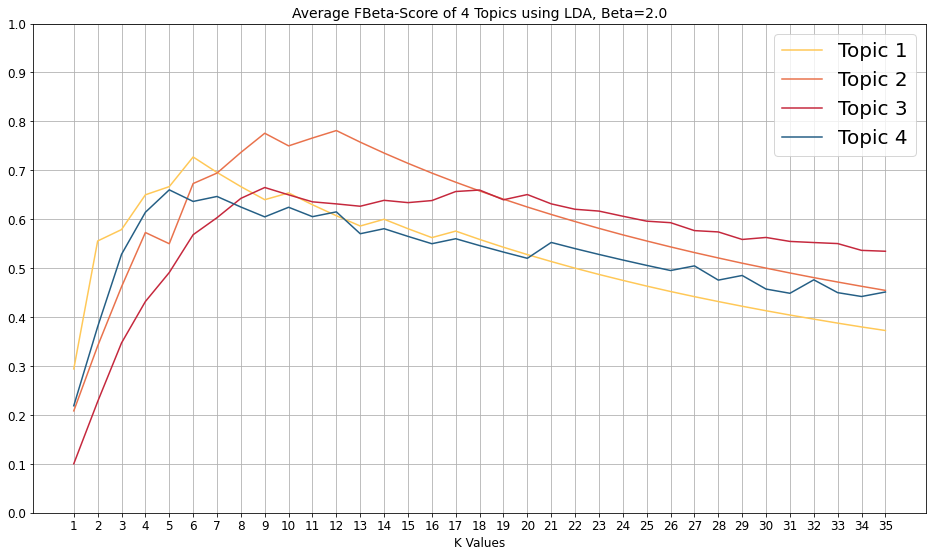

In [31]:
# 繪製Average FB20-Score of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using LDA, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb20_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using LDA_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

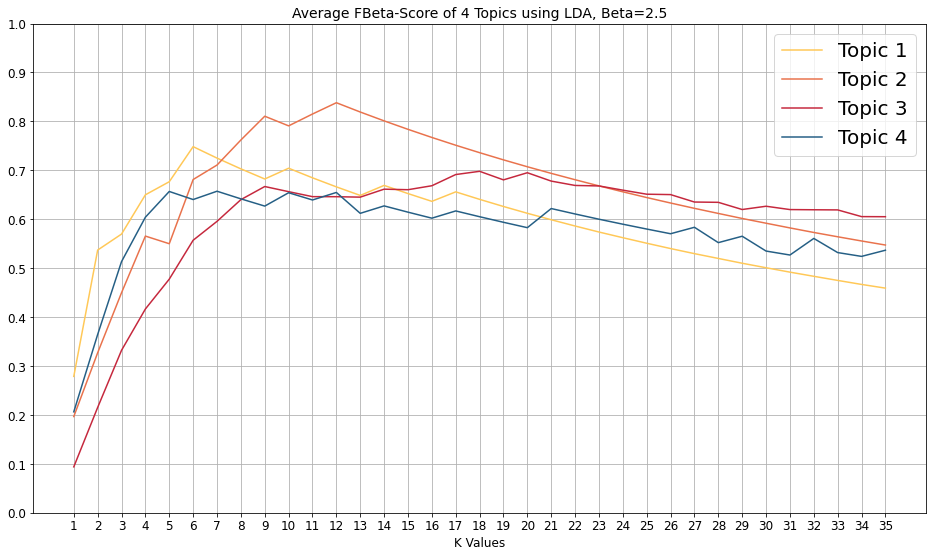

In [32]:
# 繪製Average FB25-Score of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using LDA, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb25_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using LDA_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

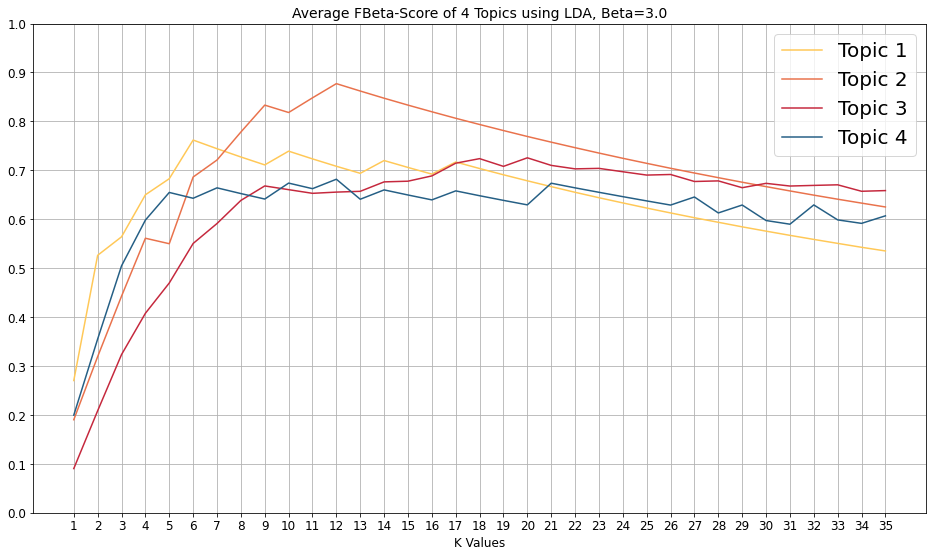

In [33]:
# 繪製Average FB30-Score of 4 Topics using LDA
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of 4 Topics using LDA, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='Topic 1')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='Topic 2')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='Topic 3')
# # Line-4
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb30_avg'], color='#255f85', linestyle='-', linewidth=1.5, label='Topic 4')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of 4 Topics using LDA_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

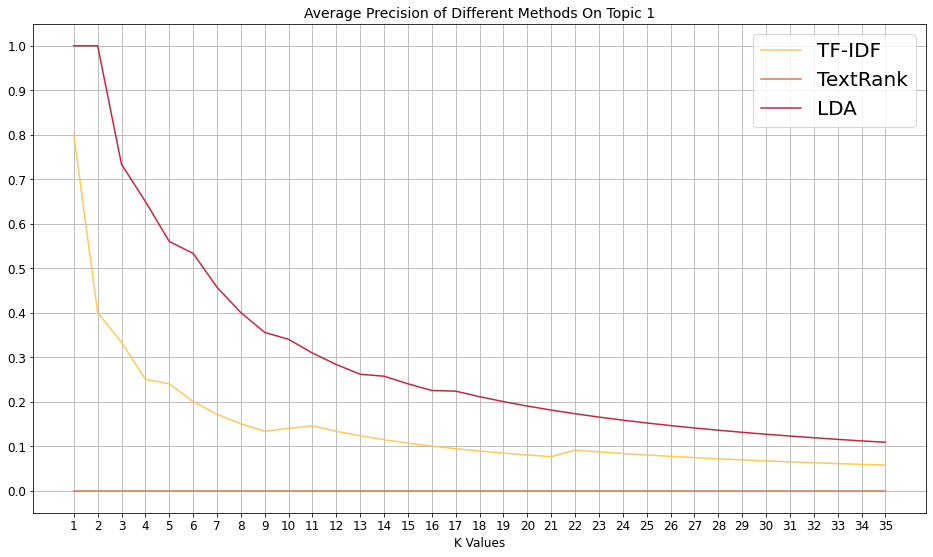

In [34]:
# 繪製Topic 1 的三種方法的Average Precision
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of Different Methods On Topic 1", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average Precision of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

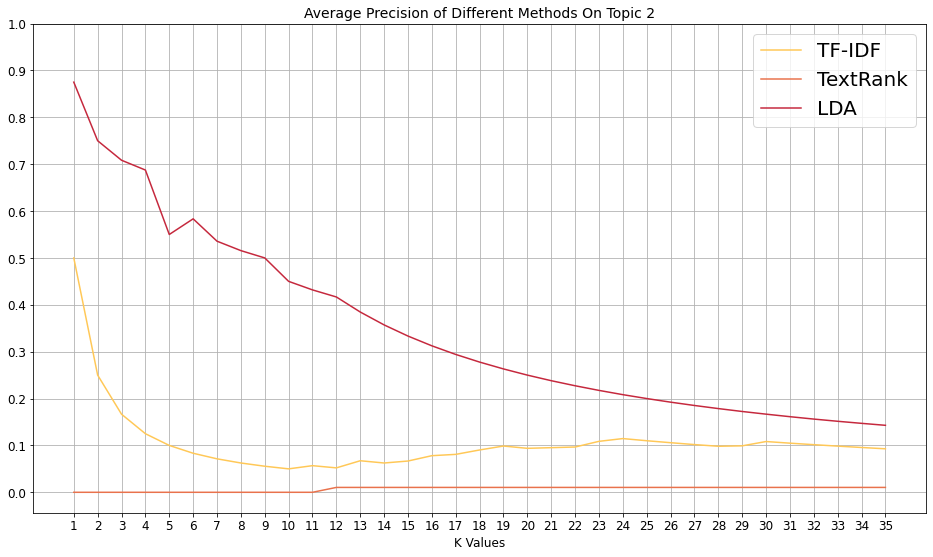

In [35]:
# 繪製Topic 2 的三種方法的Average Precision
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of Different Methods On Topic 2", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average Precision of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

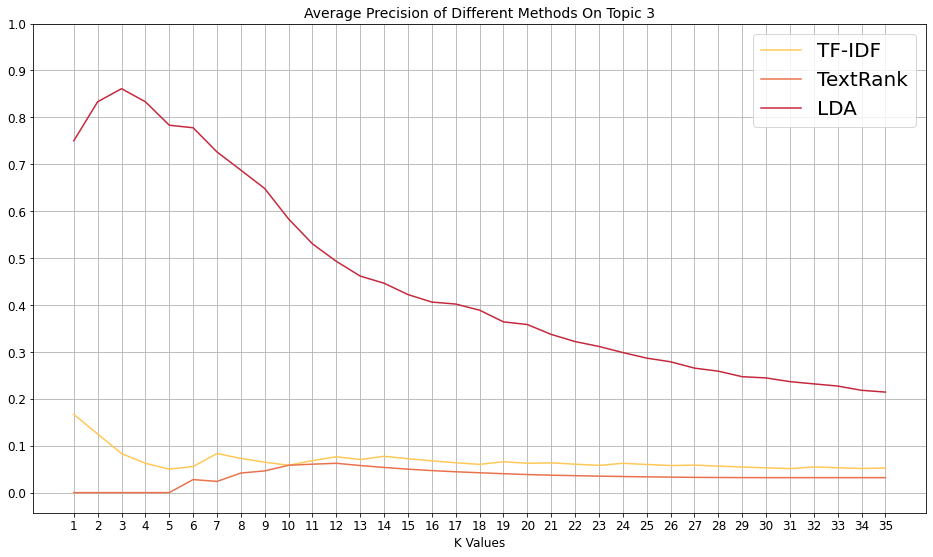

In [36]:
# 繪製Topic 3 的三種方法的Average Precision
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of Different Methods On Topic 3", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average Precision of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

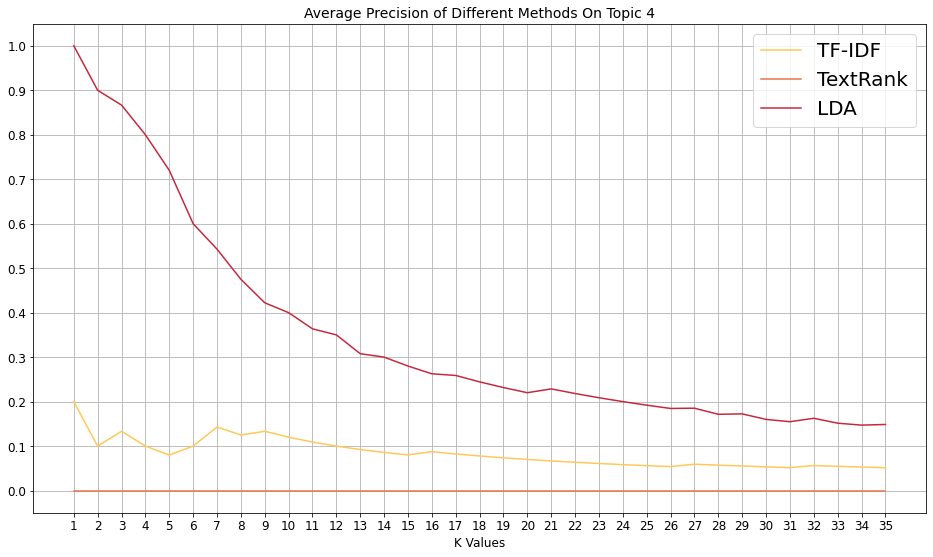

In [37]:
# 繪製Topic 4 的三種方法的Average Precision
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of Different Methods On Topic 4", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average Precision of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

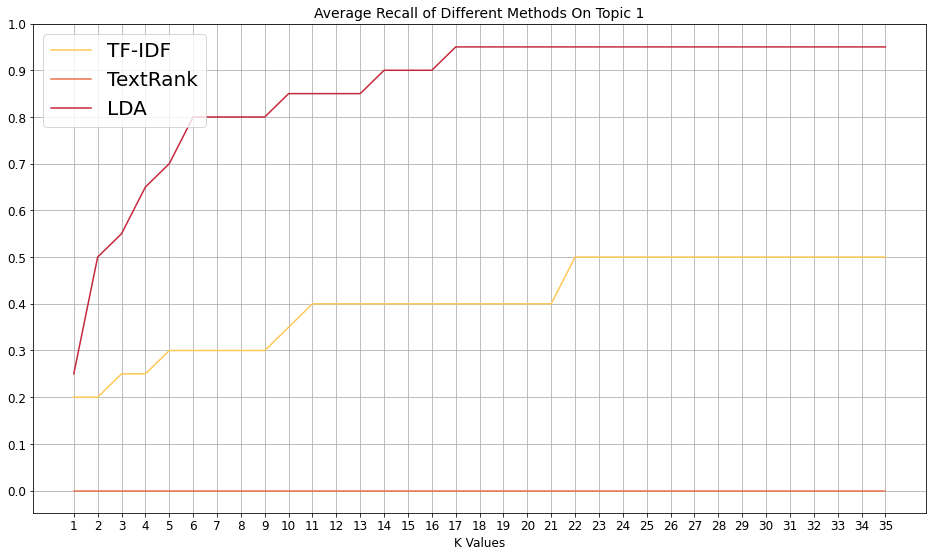

In [38]:
# 繪製Topic 1 的三種方法的Average Recall
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of Different Methods On Topic 1", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=2)
plt.grid()
plt.savefig('Topic1_Average Recall of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

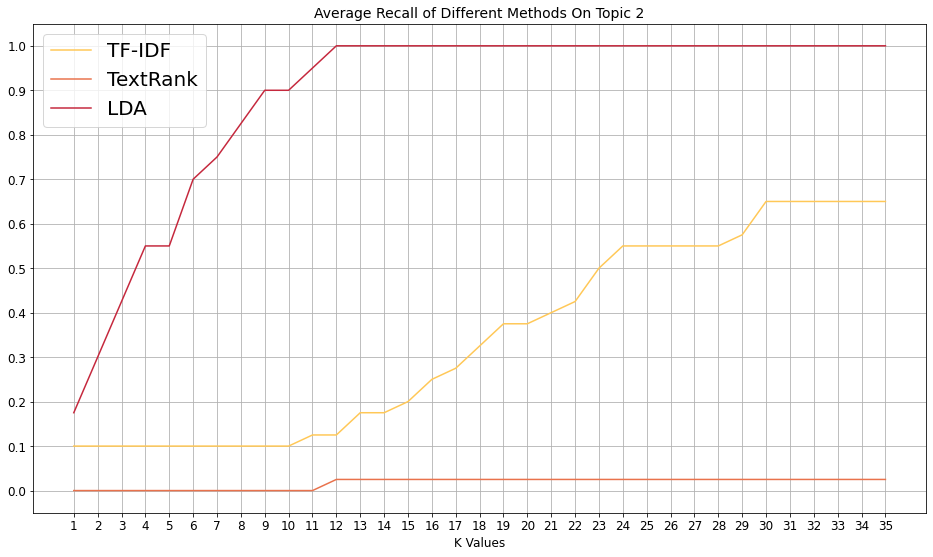

In [39]:
# 繪製Topic 2 的三種方法的Average Recall
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of Different Methods On Topic 2", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=2)
plt.grid()
plt.savefig('Topic2_Average Recall of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

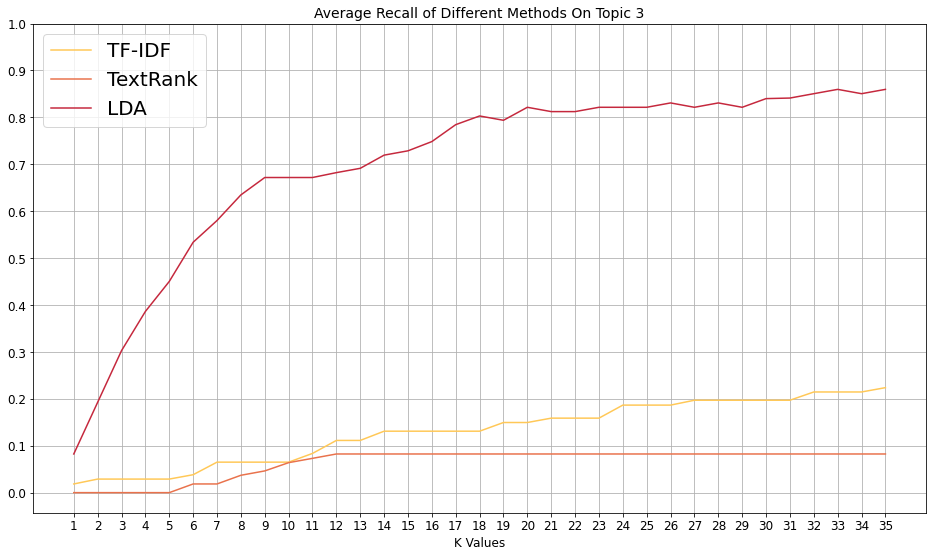

In [40]:
# 繪製Topic 3 的三種方法的Average Recall
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of Different Methods On Topic 3", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=2)
plt.grid()
plt.savefig('Topic3_Average Recall of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

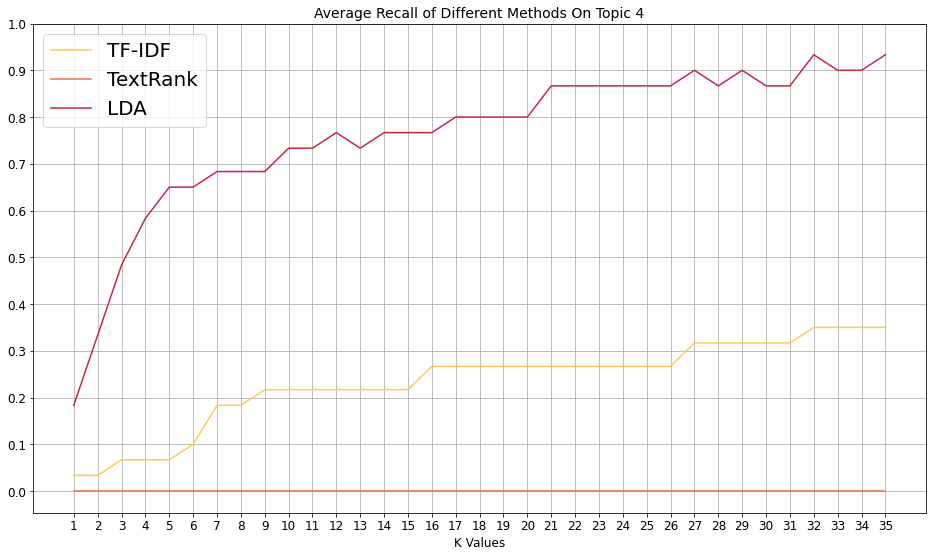

In [41]:
# 繪製Topic 4 的三種方法的Average Recall
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of Different Methods On Topic 4", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=2)
plt.grid()
plt.savefig('Topic4_Average Recall of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

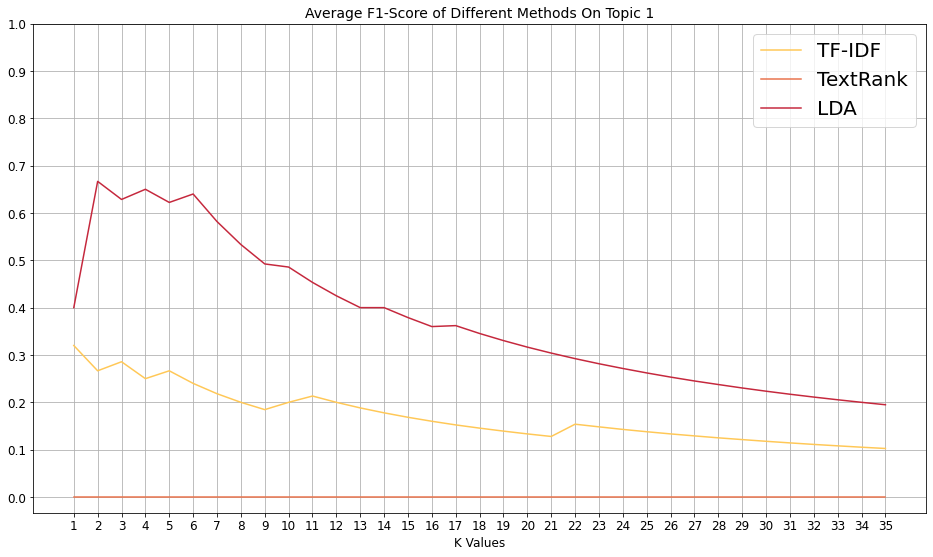

In [42]:
# 繪製Topic 1 的三種方法的Average F1-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of Different Methods On Topic 1", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average F1-Score of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

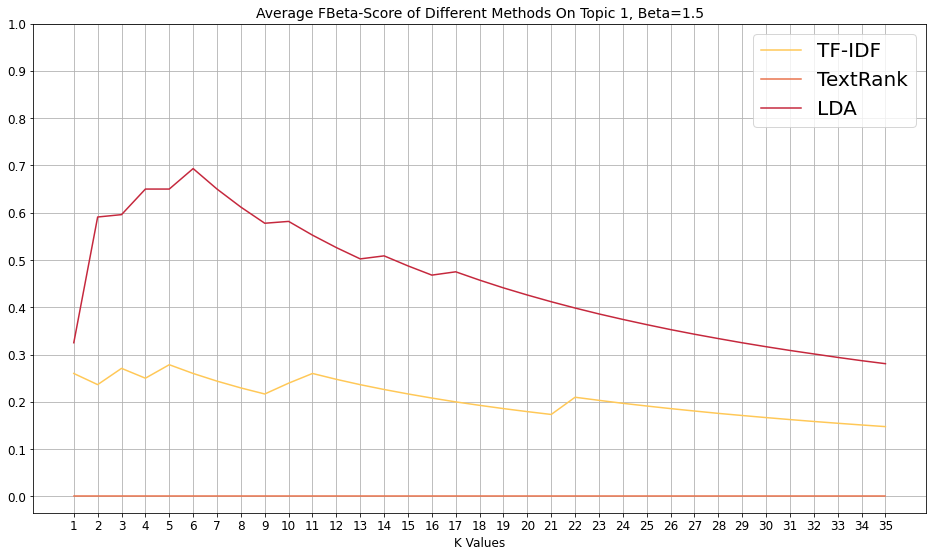

In [43]:
# 繪製Topic 1 的三種方法的Average FB15-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 1, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average FBeta-Score of Different Methods_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

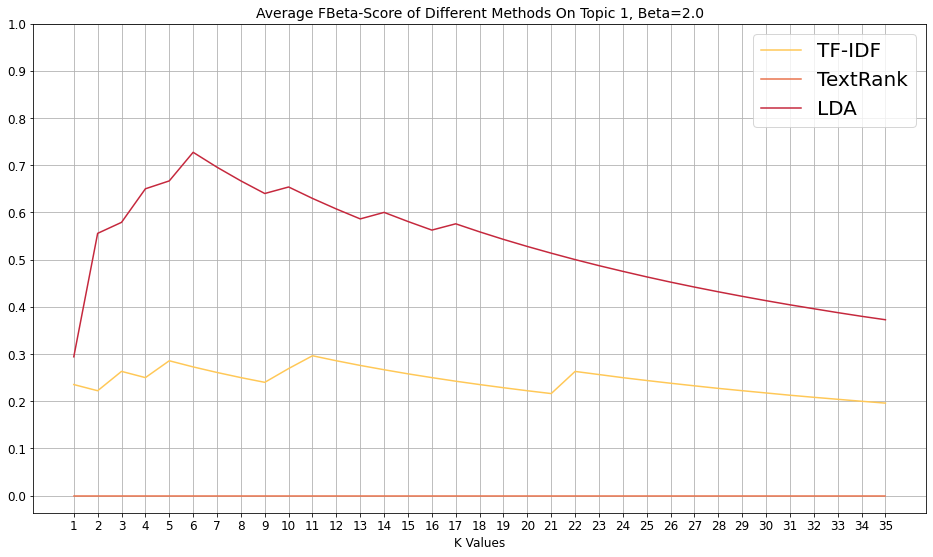

In [44]:
# 繪製Topic 1 的三種方法的Average FB20-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 1, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average FBeta-Score of Different Methods_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

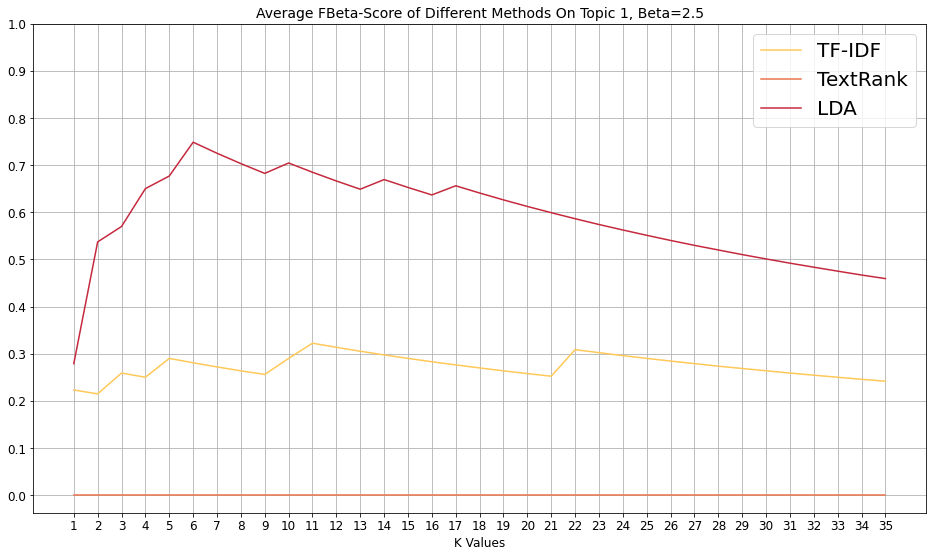

In [45]:
# 繪製Topic 1 的三種方法的Average FB25-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 1, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average FBeta-Score of Different Methods_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

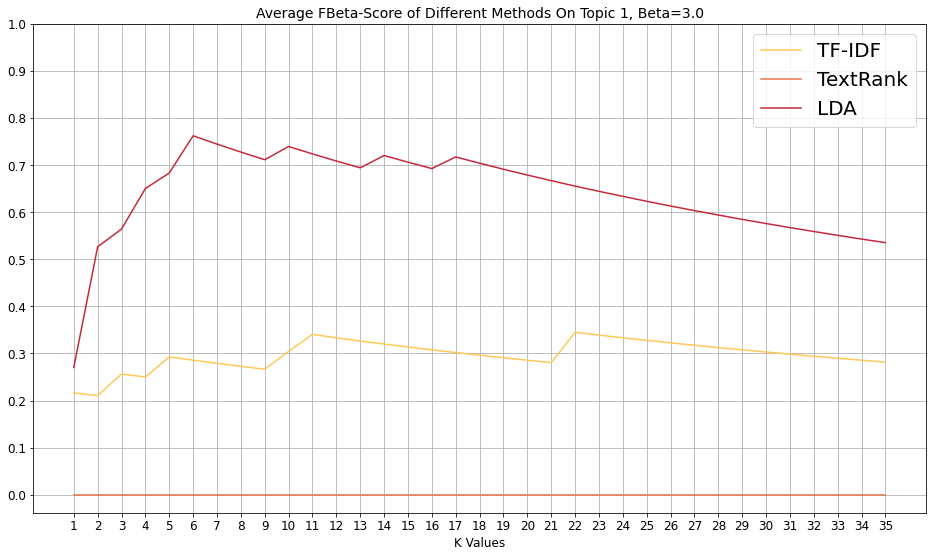

In [46]:
# 繪製Topic 1 的三種方法的Average FB30-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 1, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic1_avg['K_Value'], 
         Topic1_avg['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic1_Average FBeta-Score of Different Methods_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

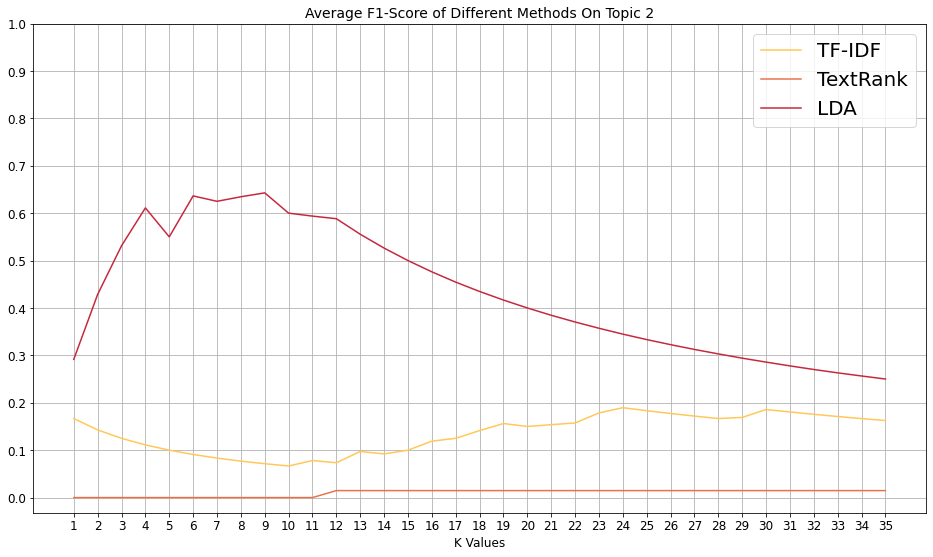

In [47]:
# 繪製Topic 2 的三種方法的Average F1-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of Different Methods On Topic 2", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average F1-Score of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

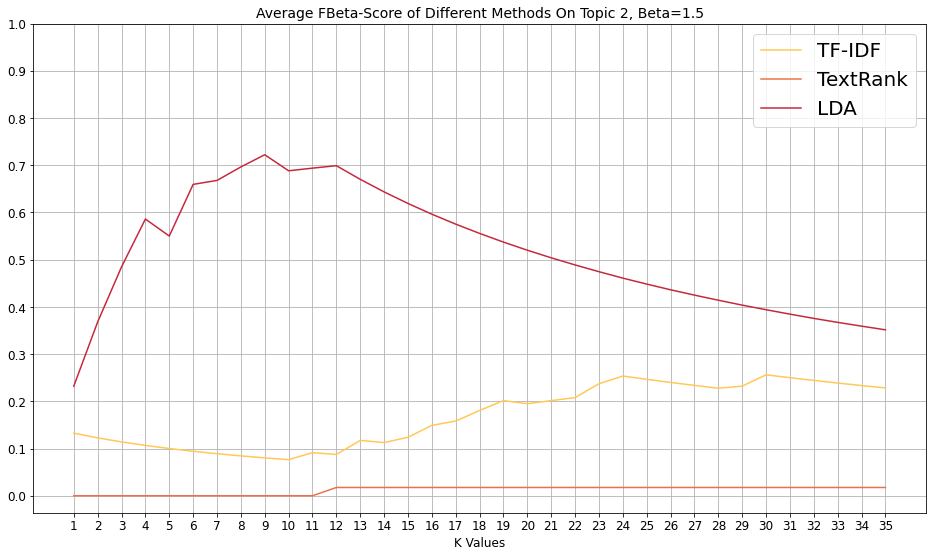

In [48]:
# 繪製Topic 2 的三種方法的Average FB15-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 2, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic2_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average FBeta-Score of Different Methods_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

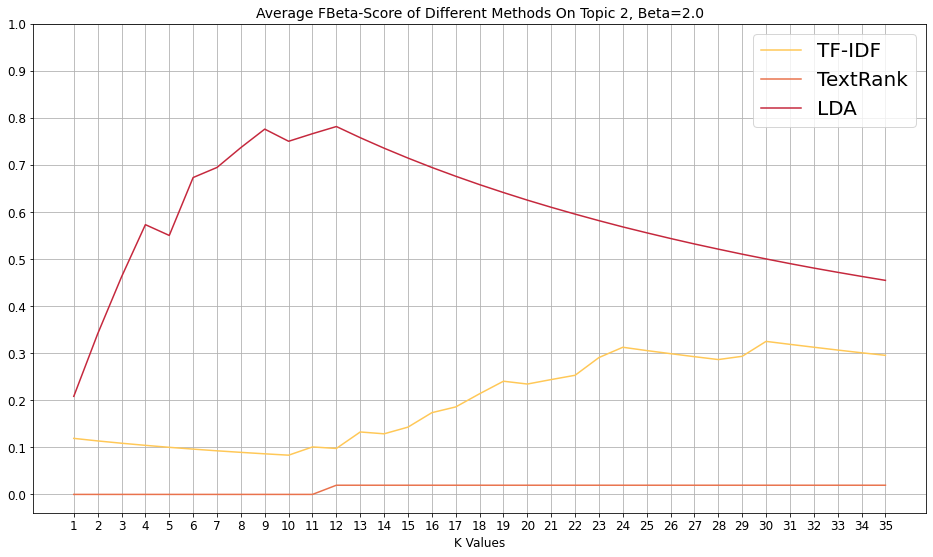

In [49]:
# 繪製Topic 2 的三種方法的Average FB20-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 2, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic2_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average FBeta-Score of Different Methods_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

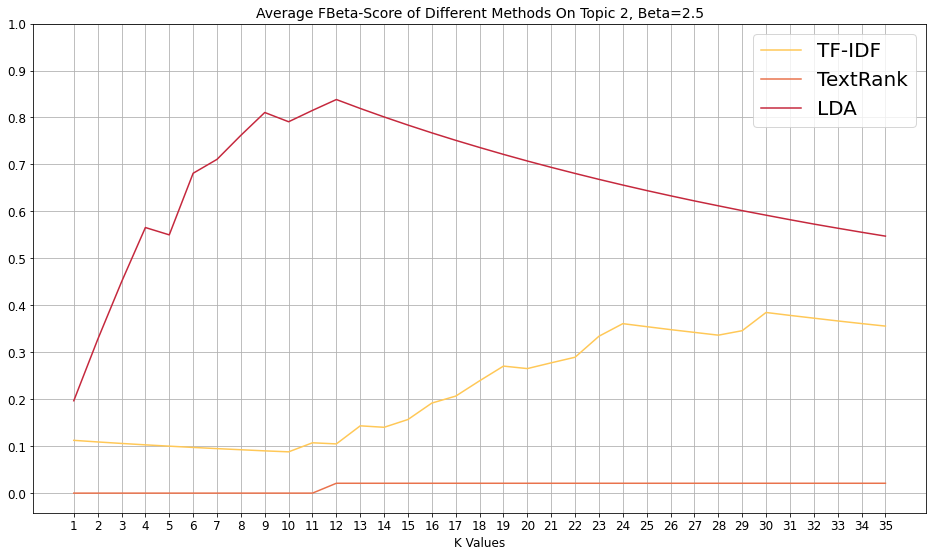

In [50]:
# 繪製Topic 2 的三種方法的Average FB25-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 2, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic2_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average FBeta-Score of Different Methods_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

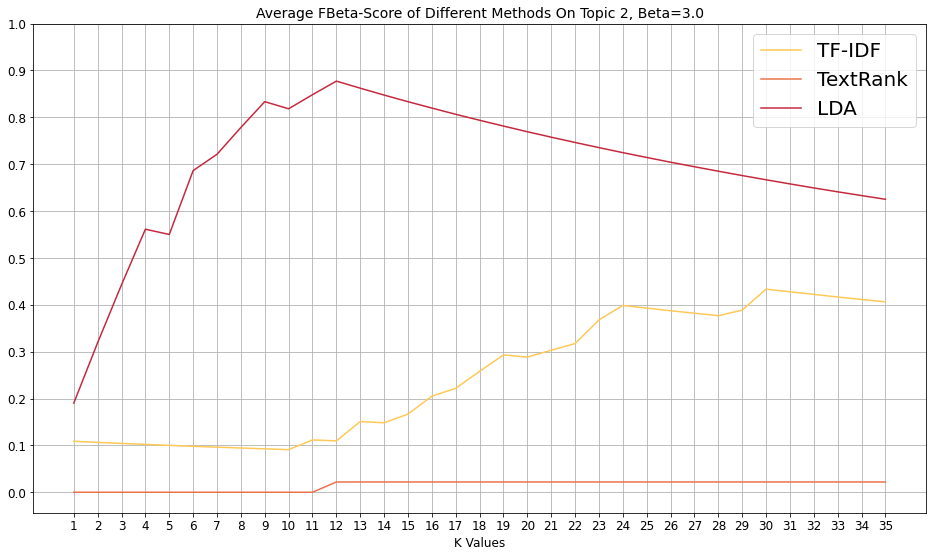

In [51]:
# 繪製Topic 2 的三種方法的Average FB30-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 2, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic2_avg['K_Value'], 
         Topic2_avg['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic2_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic2_Average FBeta-Score of Different Methods_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

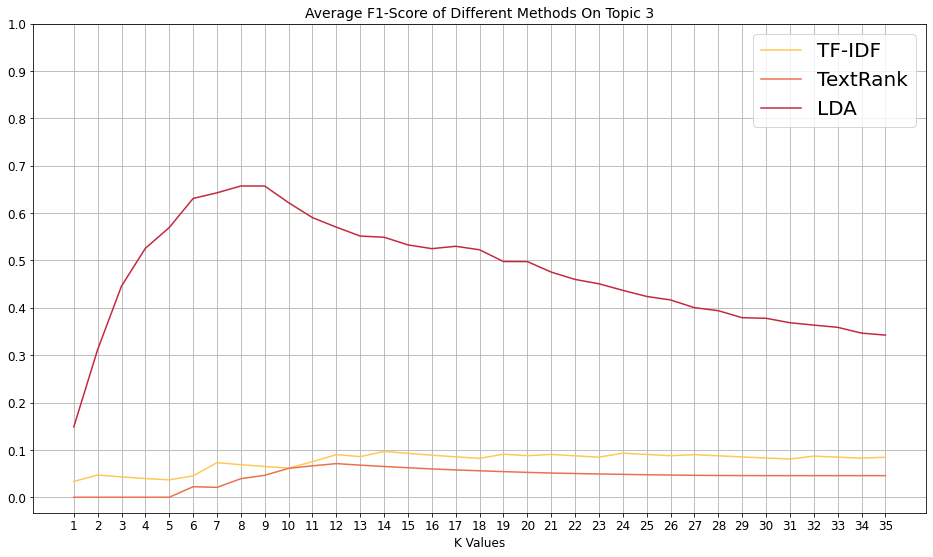

In [52]:
# 繪製Topic 3 的三種方法的Average F1-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of Different Methods On Topic 3", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average F1-Score of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

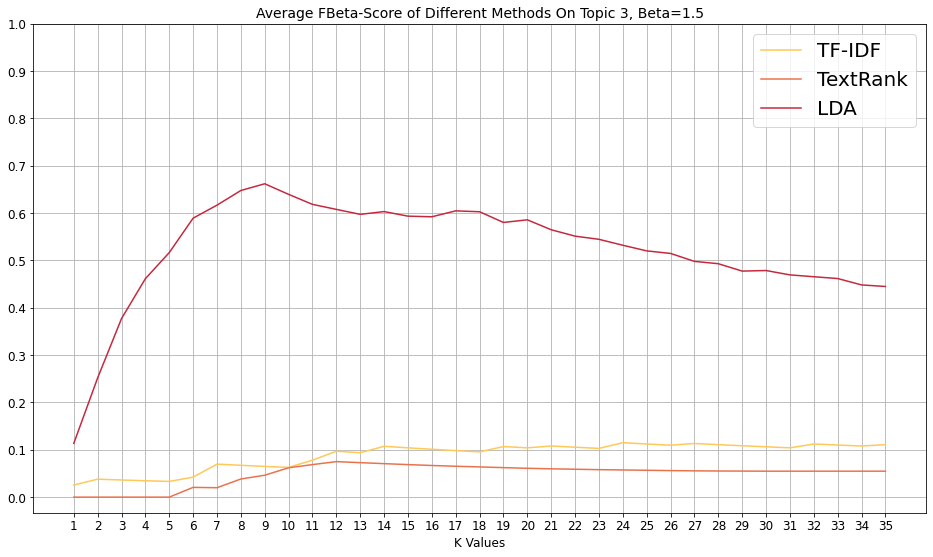

In [53]:
# 繪製Topic 3 的三種方法的Average FB15-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 3, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic3_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average FBeta-Score of Different Methods_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

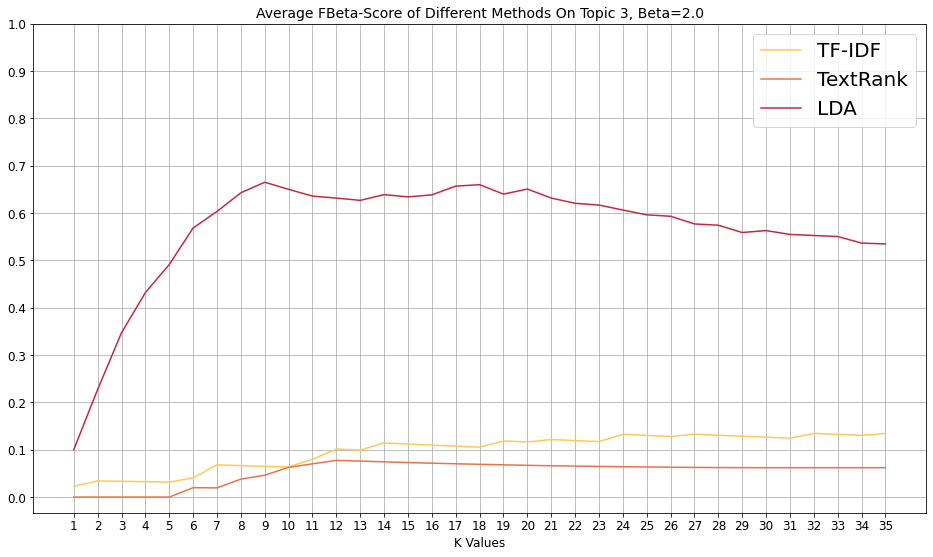

In [54]:
# 繪製Topic 3 的三種方法的Average FB20-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 3, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic3_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average FBeta-Score of Different Methods_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

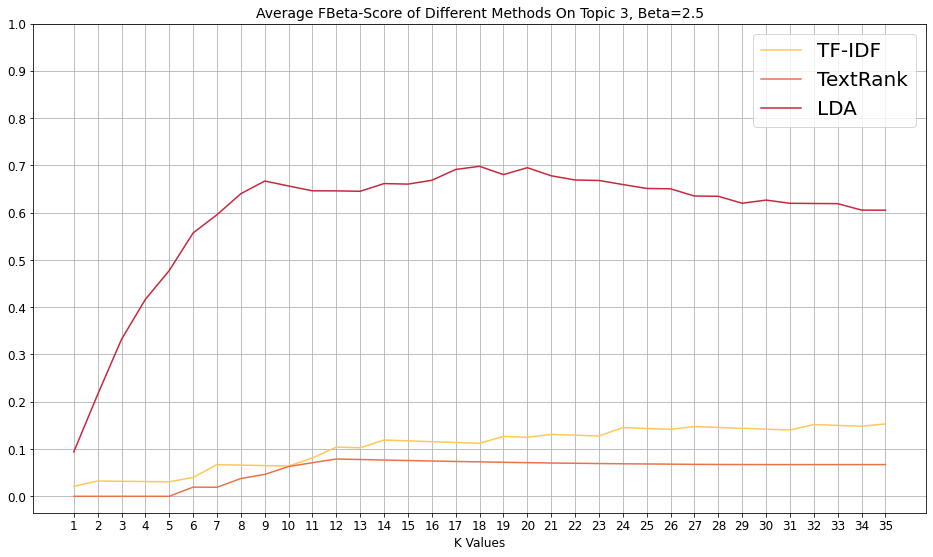

In [55]:
# 繪製Topic 3 的三種方法的Average FB25-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 3, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic3_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average FBeta-Score of Different Methods_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

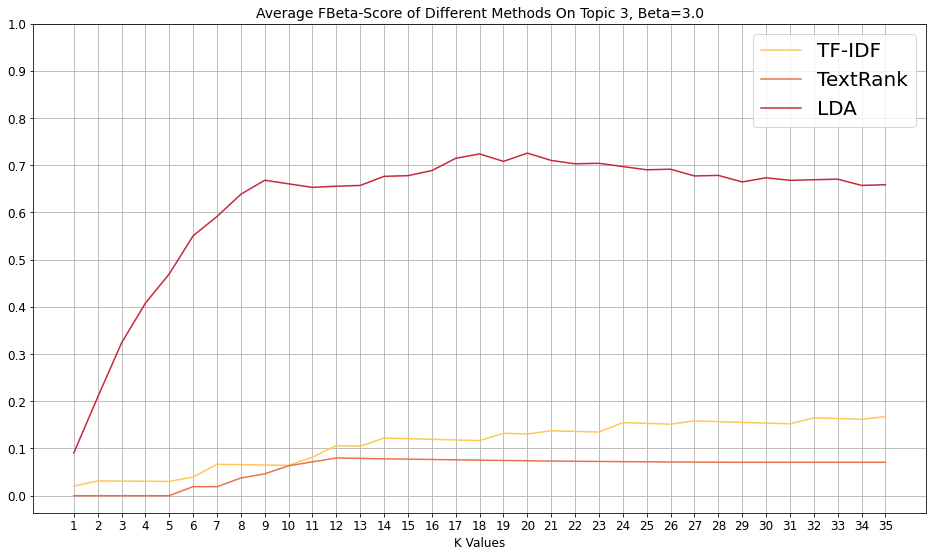

In [56]:
# 繪製Topic 3 的三種方法的Average FB30-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 3, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic3_avg['K_Value'], 
         Topic3_avg['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic3_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic3_Average FBeta-Score of Different Methods_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

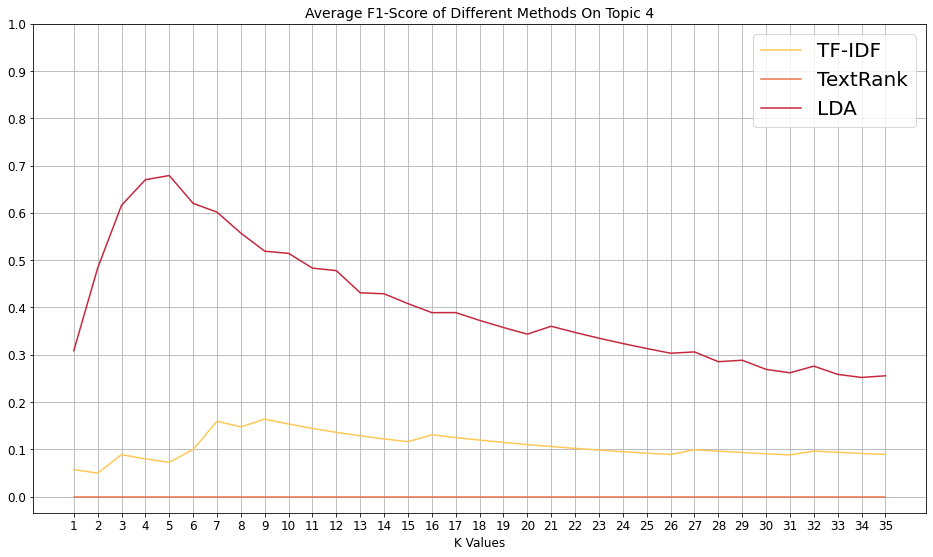

In [57]:
# 繪製Topic 4 的三種方法的Average F1-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of Different Methods On Topic 4", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic1_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average F1-Score of Different Methods.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

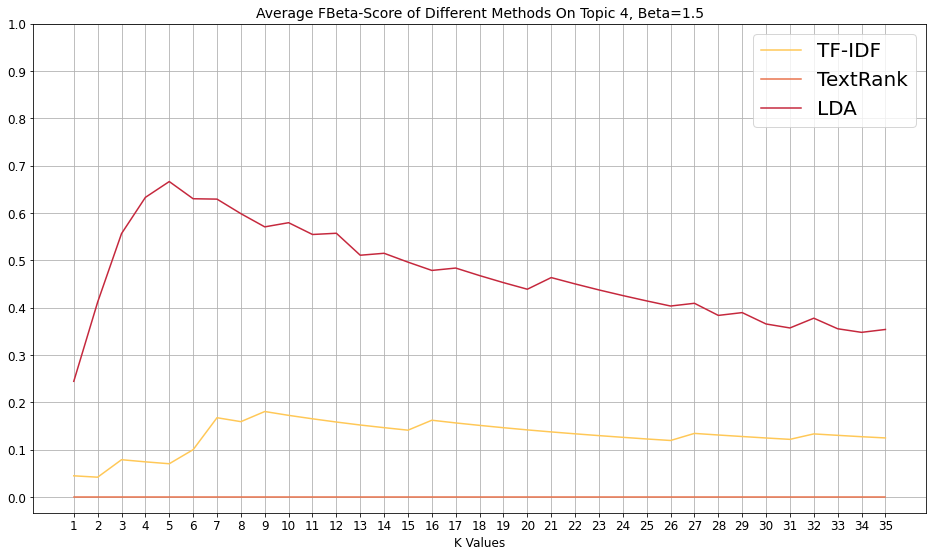

In [58]:
# 繪製Topic 4 的三種方法的Average FB15-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 4, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic4_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average FBeta-Score of Different Methods_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

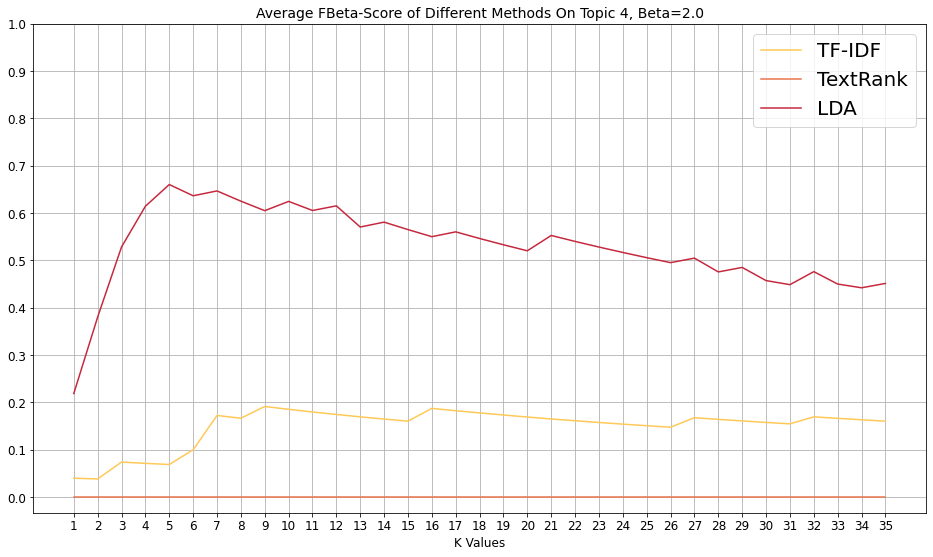

In [59]:
# 繪製Topic 4 的三種方法的Average FB20-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 4, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic4_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average FBeta-Score of Different Methods_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

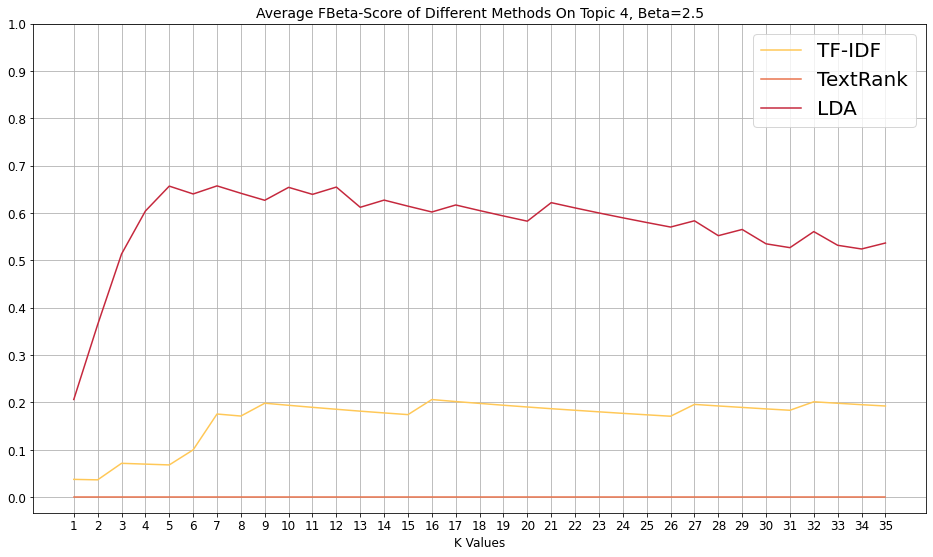

In [60]:
# 繪製Topic 4 的三種方法的Average FB25-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 4, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic4_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average FBeta-Score of Different Methods_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

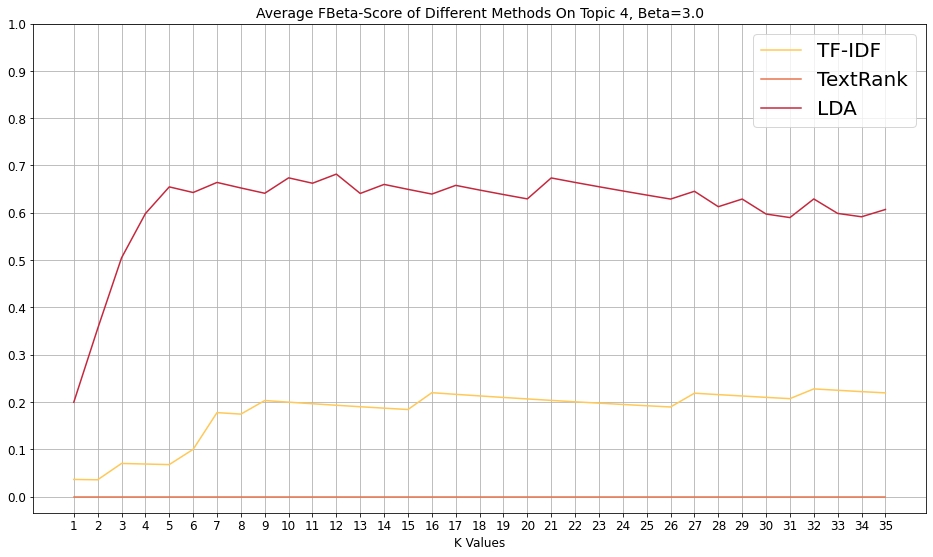

In [61]:
# 繪製Topic 4 的三種方法的Average FB30-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On Topic 4, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(Topic4_avg['K_Value'], 
         Topic4_avg['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(Topic4_avg['K_Value'], fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Topic4_Average FBeta-Score of Different Methods_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

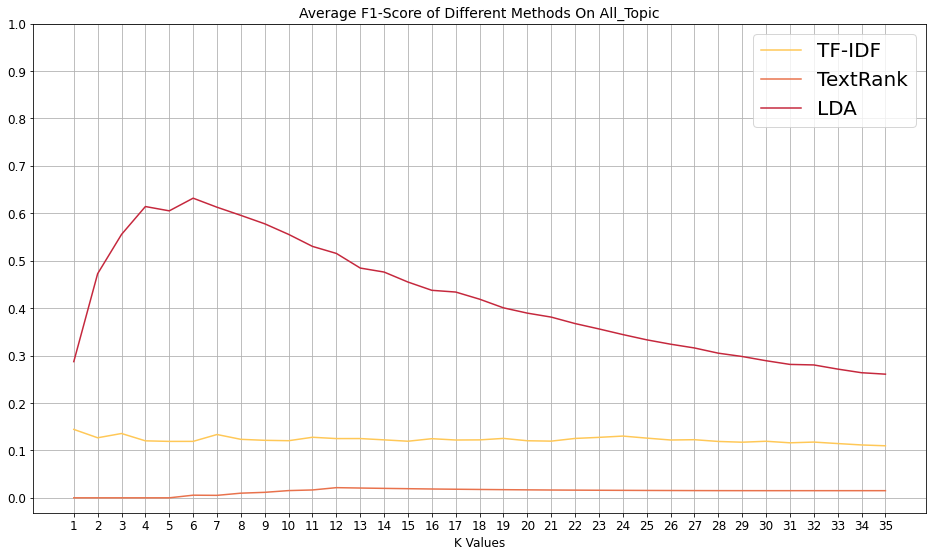

In [62]:
# 繪製All Average 的三種方法的Average F1-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average F1-Score of Different Methods On All_Topic", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_f1_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_f1_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_f1_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average F1-Score of Different Methods On All_Topic.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

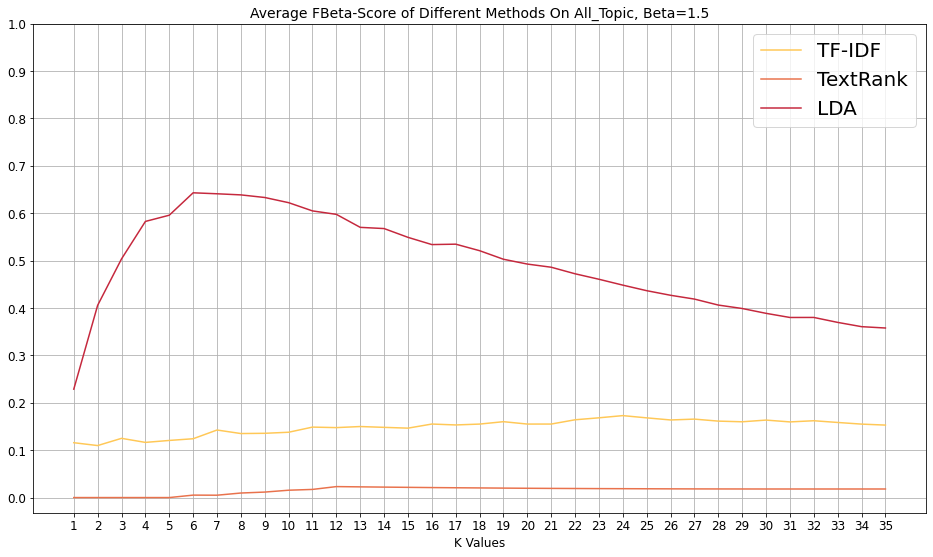

In [63]:
# 繪製All Average 的三種方法的Average FB15-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On All_Topic, Beta=1.5", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_fb15_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_fb15_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_fb15_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of Different Methods On All_Topic_Beta=15.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

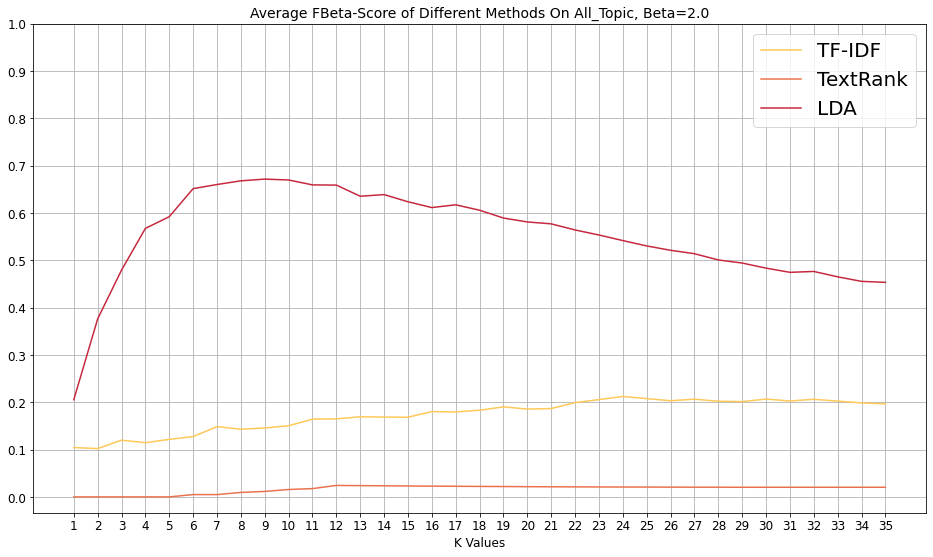

In [64]:
# 繪製All Average 的三種方法的Average FB20-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On All_Topic, Beta=2.0", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_fb20_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_fb20_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_fb20_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of Different Methods On All_Topic_Beta=20.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

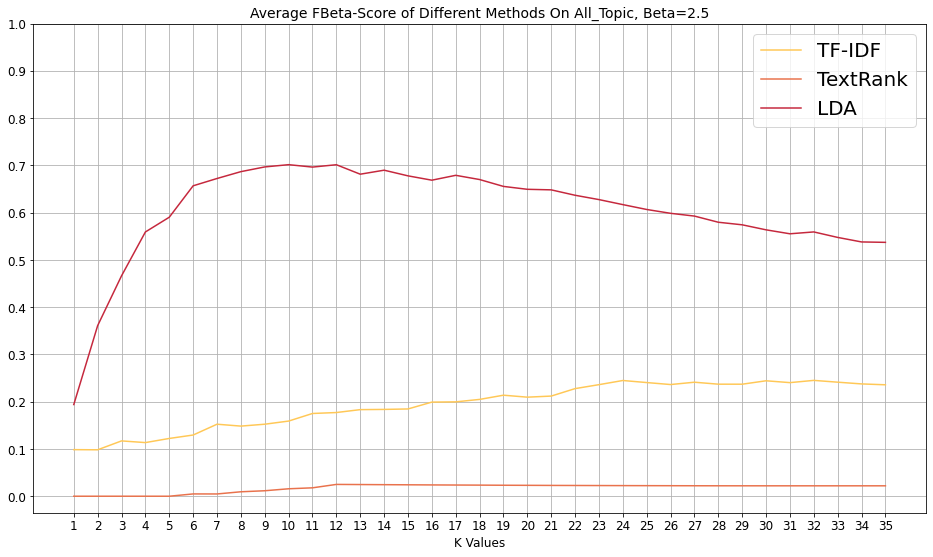

In [65]:
# 繪製All Average 的三種方法的Average FB25-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On All_Topic, Beta=2.5", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_fb25_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_fb25_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_fb25_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of Different Methods On All_Topic_Beta=25.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

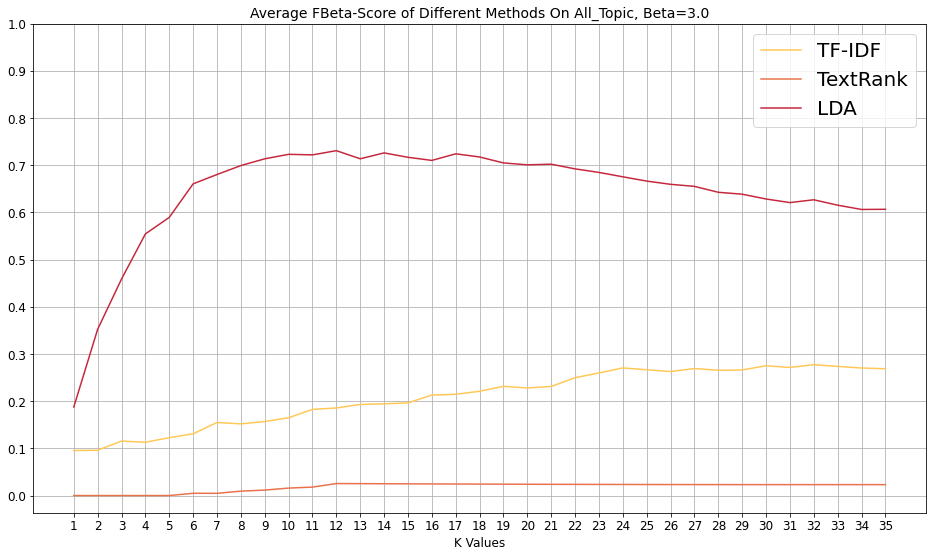

In [66]:
# 繪製All Average 的三種方法的Average FB30-Score
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average FBeta-Score of Different Methods On All_Topic, Beta=3.0", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_fb30_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_fb30_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_fb30_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average FBeta-Score of Different Methods On All_Topic_Beta=30.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

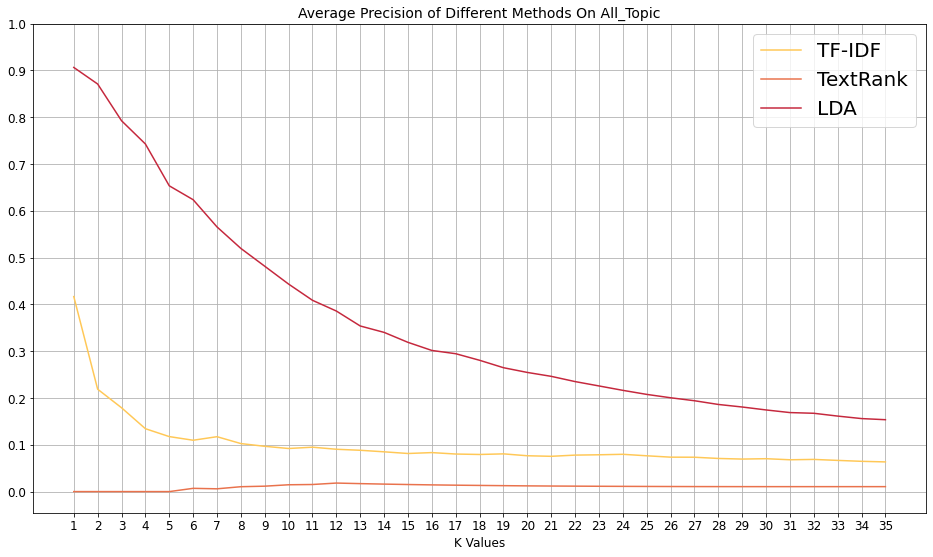

In [67]:
# 繪製All Average 的三種方法的Average Precision
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Precision of Different Methods On All_Topic", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_pc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_pc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_pc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Precision of Different Methods On All_Topic.PNG', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

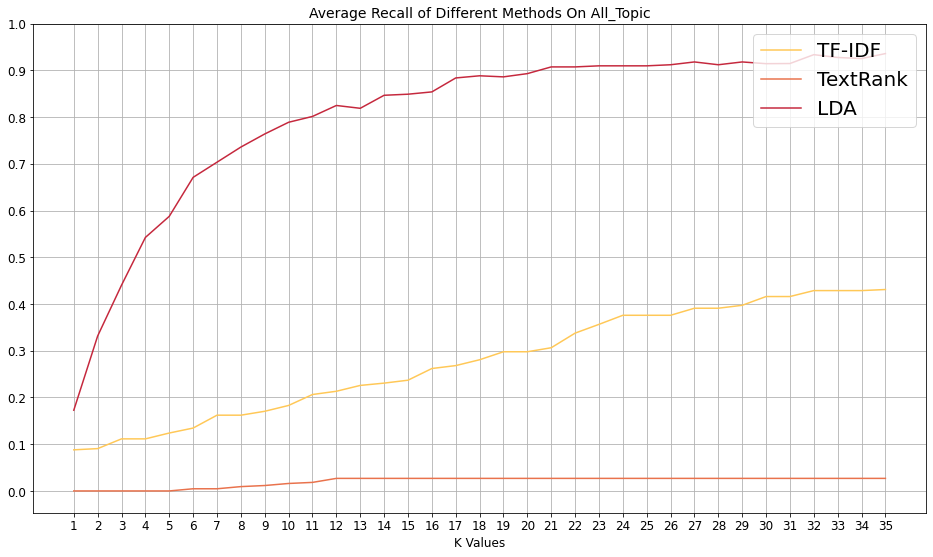

In [68]:
# 繪製All Average 的三種方法的Average Recall
plt.clf()
plt.figure(figsize=(16,9))
plt.title("Average Recall of Different Methods On All_Topic", fontsize=14, color='k')
# Line-1
plt.plot(avg_alltopic.index, 
         avg_alltopic['TFIDF_rc_avg'], color='#ffc857', linestyle='-', linewidth=1.5, label='TF-IDF')
# Line-2
plt.plot(avg_alltopic.index, 
         avg_alltopic['TextRank_rc_avg'], color='#e9724c', linestyle='-', linewidth=1.5, label='TextRank')
# # Line-3
plt.plot(avg_alltopic.index, 
         avg_alltopic['LDA_rc_avg'], color='#c5283d', linestyle='-', linewidth=1.5, label='LDA')
plt.xticks(avg_alltopic.index, fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=12)
plt.xlabel("K Values", fontsize=12)
plt.legend(fontsize="20", loc=1)
plt.grid()
plt.savefig('Average Recall of Different Methods On All_Topic.PNG', dpi=300)
plt.show()